## Reinforcement Learning - Thompson Sampling

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset into variables
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
rows, columns = dataset.shape
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:, (columns - 1)].values
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [5]:
print("Total Reward: ", total_reward)

Total Reward:  1226


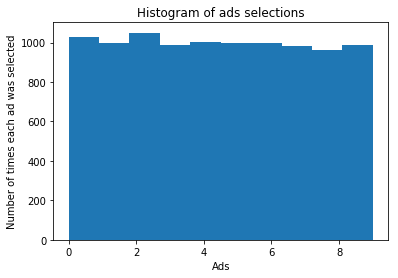

In [6]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [7]:
# Implementing Thompson Sampling 
import random
N = rows
d = columns
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1 , number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward ==1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward

In [8]:
print("Total Reward: ", total_reward)

Total Reward:  2597


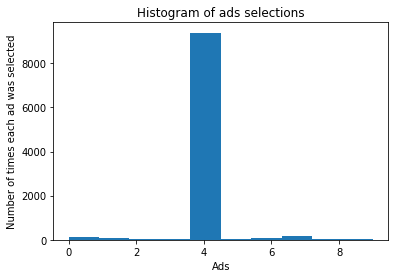

In [9]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()